In [1]:
%matplotlib inline
import importlib
import codecs
import os
import pandas
import numpy 
import datetime as dt
import scipy.stats
import pandasql.sqldf
import matplotlib.axis as axis
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pandas.options.display.max_rows = 200
pandas.options.display.max_columns = 50
pandas.options.display.width = 300
pandas.set_option('display.float_format', lambda x: '%.8f' % x)

import trm3.impute
import trm3.utility

input_file = r"D:\projects\Python36-Package-Development\trm3pylib\data-csv\zillow_train.csv"
with codecs.open(input_file, 'r', encoding='utf-8') as f:
   df= pandas.read_csv(f, sep=",", header=0, low_memory=False, parse_dates=True)

df["datecol"] = pandas.to_datetime(df.transactiondate)
df["interval"] = df["datecol"] - dt.datetime.now().date()
df["fips"].fillna(value=df["fips"].mode().tolist()[0], inplace=True)


In [ ]:
importlib.reload(trm3.impute)
importlib.reload(trm3.utility)

In [22]:
import matplotlib.axis as axis

In [67]:
def autolabel(rects, ax, percentages=False):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)
        
        height = 100*height
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%.1f %%' % height,
                ha='center', va='bottom')


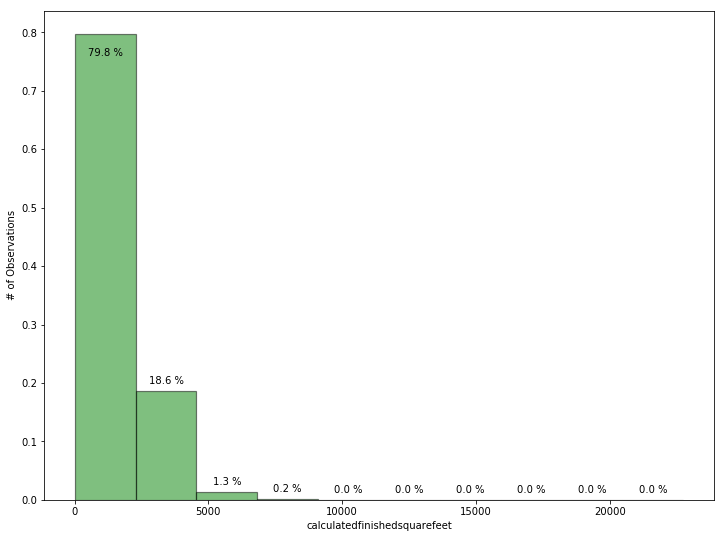

In [68]:
col="calculatedfinishedsquarefeet"
plt.rcParams["figure.figsize"] = [12, 9]
nomiss = df[col].notnull()
histogram = plt.figure()
weights = numpy.ones_like(df.loc[nomiss,col])/float(len(df.loc[nomiss,col]))
n, bins, patches = plt.hist(df.loc[nomiss,col], alpha=.5, facecolor='green', 
                            edgecolor='black', linewidth=1.2, weights=weights)
plt.xlabel(col)
plt.ylabel('# of Observations')
autolabel(patches, plt.gca(), percentages=True)
plt.show()
plt.close()


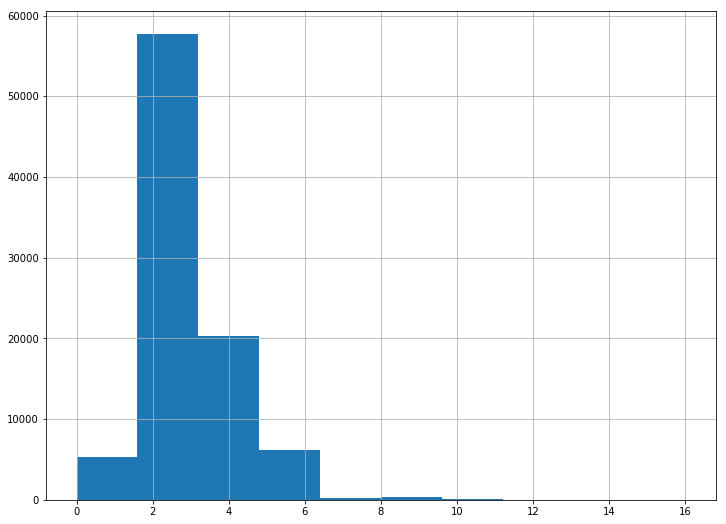

In [9]:
df.bedroomcnt.hist()

In [ ]:
importlib.reload(trm3.impute)    
my_imputer = trm3.impute.Imputer(train_df = df,
                                 test_df = None,
                                 columns = [x for x in df.columns.tolist() if x[0:3] != "dv_" and x !="fips"],
#                                  columns = ["datecol"],
                                 groupby = ["fips"],
                                 label = "dv_avg_error",
                                 method = 2,
                                 mode_fallback_distinct_values = 3,
                                 mean_label_min_obs = .005,
                                 mean_label_bins = 10,
                                 nominal_new_category_min_obs = .01,
                                 missing_indicators = False,
                                 missing_indicators_min_obs = .01,
                                 model_x_columns = None,
                                 verbose=False
                                )

my_imputer_rules = my_imputer.fit()
my_imputer_rules.impute(impute_df=df, inplace=False, verbose=True)

In [ ]:
print(my_imputer_rules.python_code())

In [ ]:
matplotlib.pyplot.rcParams["figure.figsize"]

In [ ]:
print("[%03d]" % 5)

In [ ]:
cols = df.columns.tolist()
cols.sort()

In [14]:
sdf = trm3.utility.df_contents(df, display_html_output=True)
#                   excel_filename=r"D:\projects\Python36-Package-Development\temp\test01.xlsx",
#                   excel_sheet_name="DF Summary")

,column_dtype,n_missing,n_non_missing,n_boolean,n_float,n_integer,n_string,n_datetime,n_timedelta,n_unique_values,mode,mean,stdev,min,p1,p5,p10,p25,median,p75,p90,p95,p99,max
Column Name,,,,,,,,,,,,,,,,,,,,,,,,
airconditioningtypeid,float64,61934,28748,0,28748,0,0,0,0,7,[1.0],1.81522193,2.97210778,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,13.00000000,13.00000000,13.00000000
architecturalstyletypeid,float64,90422,260,0,260,0,0,0,0,7,[7.0],7.23076923,2.72139659,2.00000000,2.00000000,3.00000000,7.00000000,7.00000000,7.00000000,7.00000000,7.00000000,8.00000000,21.00000000,21.00000000
assessmentyear,float64,532,90150,0,90150,0,0,0,0,2,[2015.0],2015.00000000,0.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000,2015.00000000
basementsqft,float64,90639,43,0,43,0,0,0,0,40,[1528.0],713.58139535,437.43419818,100.00000000,126.04000000,169.60000000,196.40000000,407.50000000,616.00000000,872.00000000,1492.40000000,1528.00000000,1553.32000000,1555.00000000
bathroomcnt,float64,532,90150,0,90150,0,0,0,0,24,[2.0],2.27954520,1.00413283,0.00000000,0.00000000,1.00000000,1.00000000,2.00000000,2.00000000,3.00000000,3.00000000,4.00000000,5.50000000,20.00000000
bedroomcnt,float64,532,90150,0,90150,0,0,0,0,18,[3.0],3.03193566,1.15611372,0.00000000,0.00000000,1.00000000,2.00000000,2.00000000,3.00000000,4.00000000,4.00000000,5.00000000,6.00000000,16.00000000
buildingclasstypeid,float64,90666,16,0,16,0,0,0,0,2,[4.0],4.00000000,0.00000000,4.00000000,4.00000000,4.00000000,4.00000000,4.00000000,4.00000000,4.00000000,4.00000000,4.00000000,4.00000000,4.00000000
buildingqualitytypeid,float64,33398,57284,0,57284,0,0,0,0,9,[7.0],5.56539348,1.90044284,1.00000000,1.00000000,4.00000000,4.00000000,4.00000000,7.00000000,7.00000000,7.00000000,7.00000000,10.00000000,12.00000000
calculatedbathnbr,float64,1708,88974,0,88974,0,0,0,0,23,[2.0],2.30917459,0.97613689,1.00000000,1.00000000,1.00000000,1.00000000,2.00000000,2.00000000,3.00000000,3.00000000,4.00000000,5.50000000,20.00000000
